In [ ]:
import kagglehub
cardekho_dataset = kagglehub.dataset_download('manishkr1754/cardekho-used-car-data')

print('Data source import complete.')


100%|██████████| 230k/230k [00:00<00:00, 68.9MB/s]

Extracting files...
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/manishkr1754/cardekho-used-car-data/versions/2/cardekho_dataset.csv')

In [ ]:
df.drop(columns = ['max_power', 'car_name', 'Unnamed: 0', 'seller_type'], inplace = True)

In [ ]:
df

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,seats,selling_price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,7,1225000


In [ ]:
df.rename(columns={
    'brand': 'Brand',
    'model': 'Model',
    'vehicle_age': 'M-Year',
    'km_driven': 'KM-Driven',
    'fuel_type': 'Fuel-Type',
    'transmission_type': 'Transmission',
    'engine': 'Engine-Capacity',
    'selling_price': 'Price',
    'mileage': 'Mileage',
    'seats': 'Seats'
}, inplace = True)

In [ ]:
df

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,7,1225000


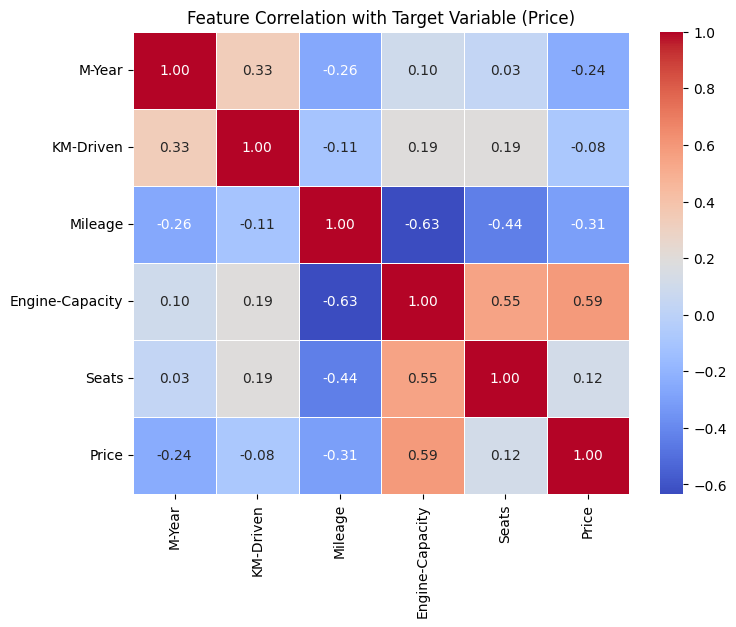

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns

# Identify numerical columns
numerical_cols = ["M-Year", "KM-Driven", "Mileage", "Engine-Capacity", "Seats"]

# Compute correlation with target variable (Price)
correlation_matrix = df[numerical_cols + ["Price"]].corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Target Variable (Price)")

plt.savefig("correlation_graph.png", dpi=300, bbox_inches='tight')

plt.show()

from google.colab import files
files.download('correlation_graph.png')

# Drop features with very low correlation (< 0.1)
low_correlation_features = correlation_matrix["Price"].abs() < 0.1
numerical_cols = correlation_matrix.index[~low_correlation_features].tolist()
numerical_cols.remove("Price")  # Keep only feature columns

In [ ]:
# ["M-Year", "KM-Driven", "Mileage", "Engine-Capacity", 'Max-Power', "Seats"]
numerical_cols

['M-Year', 'Mileage', 'Engine-Capacity', 'Seats']

In [ ]:
low_correlation_features

,Price
M-Year,False
KM-Driven,True
Mileage,False
Engine-Capacity,False
Seats,False
Price,False


In [ ]:
df

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,7,1225000


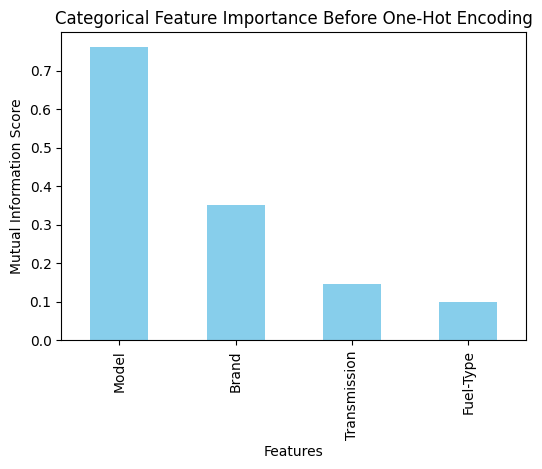

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["Brand", "Model", "Fuel-Type", "Transmission"]

# Encode categorical features into numerical values for analysis
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Compute Mutual Information Scores
mi_scores = mutual_info_regression(df_encoded[categorical_cols], df["Price"])
mi_scores = pd.Series(mi_scores, index=categorical_cols).sort_values(ascending=False)

# Plot Mutual Information Scores
plt.figure(figsize=(6, 4))
mi_scores.plot(kind="bar", color="skyblue")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Categorical Feature Importance Before One-Hot Encoding")

plt.savefig("categorical-features.png", dpi=300, bbox_inches='tight')

plt.show()

from google.colab import files
files.download('categorical-features.png')

# Drop features with very low mutual information score (< 0.01)
selected_categorical_cols = mi_scores[mi_scores > 0.01].index.tolist()

In [ ]:
# Drop categorical features that have only one unique value
for col in categorical_cols:
    unique_values = df[col].nunique()
    if unique_values == 1:
        print(f"🔴 Dropping '{col}' because it has only one unique value.")
        selected_categorical_cols.remove(col)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
# Assuming df, numerical_cols, selected_categorical_cols are already defined
# Example placeholders (replace with your actual data/variables)
# df = pd.DataFrame(...)
# numerical_cols = [...]
# selected_categorical_cols = [...]
# df["Price"] = ...

# Prepare final selected features before encoding
selected_features = numerical_cols + selected_categorical_cols
X = df[selected_features]

print(f"Original number of features: {len(selected_features)}")
print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features selected: {len(selected_categorical_cols)}")

# --- One-hot encoding ---
# Make sure to handle potential missing values before encoding if necessary
X_encoded = pd.get_dummies(X, columns=selected_categorical_cols, dummy_na=False) # Explicitly set dummy_na
print(f"Number of features after One-Hot Encoding: {X_encoded.shape[1]}")

# --- Define model for feature selection with parallel processing ---
# Key change: Added n_jobs=-1 to use all available CPU cores
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1       # Use all available cores for fitting the model
)

# --- Fit RFE ---
# Consider increasing 'step' if still too slow (trades speed for potential selection accuracy)
# step=0.1 means remove 10% of features each iteration
# step=10 means remove 10 features each iteration (if available)
rfe = RFE(estimator=model, n_features_to_select=5, step=1) # step=1 is default

print("Starting RFE fitting... (This might still take time depending on data size)")
rfe.fit(X_encoded, df["Price"])
print("RFE fitting completed.")

# Get the most important selected features (these are from the one-hot encoded space)
final_selected_features_encoded = X_encoded.columns[rfe.support_]

print("✅ Final Selected Features (from One-Hot Encoded data):", list(final_selected_features_encoded))

# --- Optional: Map back to original features (useful for interpretation) ---
# This requires a bit more logic to see which original features contributed
original_features_contributing = set()
for feature_name in final_selected_features_encoded:
    # Check if it's an original numerical feature
    if feature_name in numerical_cols:
        original_features_contributing.add(feature_name)
    else:
        # It's from a one-hot encoded categorical feature
        # Try to find the original categorical column name
        for cat_col in selected_categorical_cols:
            if feature_name.startswith(cat_col + "_"):
                original_features_contributing.add(cat_col)
                break # Found the original column, move to next feature

print("✅ Original Features Contributing to Final Selection:", list(original_features_contributing))

Original number of features: 8
Numerical features: 4
Categorical features selected: 4
Number of features after One-Hot Encoding: 163
Starting RFE fitting... (This might still take time depending on data size)
RFE fitting completed.
✅ Final Selected Features (from One-Hot Encoded data): ['M-Year', 'Mileage', 'Engine-Capacity', 'Transmission_Automatic', 'Transmission_Manual']
✅ Original Features Contributing to Final Selection: ['Transmission', 'M-Year', 'Engine-Capacity', 'Mileage']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Prepare final selected features before encoding
selected_features = numerical_cols + selected_categorical_cols
X = df[selected_features]
X_encoded = pd.get_dummies(X)  # One-hot encoding before feature selection

# Define model for feature selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit RFE to select the top 5 most important features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_encoded, df["Price"])

# Get the most important selected features
final_selected_features = X_encoded.columns[rfe.support_]

print("✅ Final Selected Features Before One-Hot Encoding:", list(final_selected_features))

KeyboardInterrupt: 

In [ ]:
df
# ['M-Year', 'Mileage', 'Engine-Capacity', 'Transmission_Automatic', 'Transmission_Manual']

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,7,1225000


In [ ]:
df.drop(columns = ['max_power', 'car_name', 'Unnamed: 0', 'seller_type'], inplace = True)

KeyError: "['max_power', 'car_name', 'Unnamed: 0', 'seller_type'] not found in axis"

In [ ]:
df

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,7,1225000


In [ ]:
df.rename(columns={
    'brand': 'Brand',
    'model': 'Model',
    'vehicle_age': 'M-Year',
    'km_driven': 'KM-Driven',
    'fuel_type': 'Fuel-Type',
    'transmission_type': 'Transmission',
    'engine': 'Engine-Capacity',
    'selling_price': 'Price',
    'mileage': 'Mileage',
    'seats': 'Seats'
}, inplace = True)

In [ ]:
df

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2179,7,1225000


In [ ]:
df['Engine-Capacity'] = df['Engine-Capacity'] * 0.001

In [ ]:
df

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,0.796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1.197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1.197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,0.998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1.498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1.086,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1.373,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1.498,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2.179,7,1225000


In [ ]:
df.describe()

,M-Year,KM-Driven,Mileage,Engine-Capacity,Seats,Price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1.486058,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,0.521107,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,0.793000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1.197000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1.248000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1.582000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6.592000,9.000000,3.950000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            15411 non-null  object 
 1   Model            15411 non-null  object 
 2   M-Year           15411 non-null  int64  
 3   KM-Driven        15411 non-null  int64  
 4   Fuel-Type        15411 non-null  object 
 5   Transmission     15411 non-null  object 
 6   Mileage          15411 non-null  float64
 7   Engine-Capacity  15411 non-null  float64
 8   Seats            15411 non-null  int64  
 9   Price            15411 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ MB


In [ ]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [ ]:
df['Model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [ ]:
df['M-Year'].unique()

array([ 9,  5, 11,  6,  8,  3,  2,  4,  7, 10, 14, 12,  1, 15, 13, 16, 17,
       18, 29, 19,  0, 21, 22, 25])

In [ ]:
df['Engine-Capacity'].unique()

array([0.796, 1.197, 0.998, 1.498, 1.582, 1.461, 1.998, 1.248, 2.143,
       2.494, 1.598, 1.497, 2.523, 2.982, 0.999, 1.199, 1.086, 2.179,
       1.396, 1.198, 1.59 , 1.997, 1.493, 1.12 , 1.196, 1.186, 1.061,
       0.799, 1.796, 2.993, 1.298, 3.198, 1.995, 1.373, 1.591, 1.968,
       1.399, 1.047, 1.353, 2.755, 1.395, 2.498, 1.999, 2.953, 2.393,
       2.967, 2.998, 2.995, 1.956, 1.462, 1.799, 2.499, 1.451, 1.194,
       1.798, 2.694, 1.496, 1.969, 2.487, 3.604, 1.499, 2.987, 1.599,
       2.354, 1.95 , 2.148, 4.134, 2.4  , 1.984, 2.979, 2.609, 2.092,
       5.998, 1.33 , 2.956, 3.598, 2.362, 0.793, 1.368, 3.597, 1.991,
       5.461, 1.343, 2.497, 4.367, 1.797, 3.498, 2.698, 1.896, 2.999,
       3.855, 4.806, 1.985, 2.771, 2.157, 3.628, 2.198, 2.996, 2.199,
       4.395, 3.456, 4.663, 2.773, 6.592, 2.495, 1.781, 2.997, 1.597,
       2.596, 4.163])

In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['KM-Driven'].unique()

array([ 120000,   20000,   60000, ...,    9229,   10723, 3800000])

In [ ]:
df['Fuel-Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df['Seats'].unique()

array([5, 8, 7, 6, 4, 2, 9, 0])

In [ ]:
df['Mileage'].unique()

array([19.7 , 18.9 , 17.  , 20.92, 22.77, 20.36, 20.51, 18.15, 16.6 ,
       22.32, 19.64, 14.41, 28.09, 25.2 , 19.27, 28.4 , 12.99, 21.4 ,
       20.85, 16.09, 19.67, 17.4 , 13.6 , 26.59, 17.7 , 17.19, 13.  ,
       23.01, 18.6 , 17.92, 15.1 , 23.4 , 22.54, 18.  , 21.  , 15.4 ,
       20.89, 26.6 , 22.5 , 17.8 , 20.54, 17.3 , 25.  , 24.  , 18.16,
       21.21, 14.  , 16.8 , 25.17, 24.3 , 18.5 , 23.84, 18.78, 11.74,
       25.1 , 21.01, 22.74, 21.9 , 15.6 , 19.1 , 22.07, 22.  , 23.1 ,
       23.  , 19.08, 18.27, 23.9 , 16.1 , 19.81, 19.44, 18.59, 20.62,
       17.01, 17.5 , 12.05, 25.83, 21.79, 13.7 , 16.47, 20.7 , 10.91,
       25.8 , 25.32, 19.87, 18.7 , 14.4 , 22.69, 20.73, 16.55, 20.  ,
       21.5 , 24.7 , 23.95, 21.63, 17.43, 25.47, 33.54, 15.96, 21.19,
       26.  , 12.55, 16.9 , 22.3 , 12.9 , 13.5 , 17.84, 27.28, 24.04,
       22.7 , 16.  , 17.6 , 21.7 , 20.45, 17.14, 19.6 , 20.4 , 12.63,
       17.1 , 15.37, 11.4 , 13.68, 17.68, 12.3 , 12.19, 17.33, 20.77,
       12.07, 20.3 ,

In [ ]:
df['Price'].describe()

,Price
count,1.541100e+04
mean,7.749711e+05
std,8.941284e+05
min,4.000000e+04
25%,3.850000e+05
50%,5.560000e+05
75%,8.250000e+05
max,3.950000e+07


In [ ]:
df[df['Seats'] == 0]

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
3217,Honda,City,18,40000,Petrol,Manual,13.00,1.493,0,115000
12619,Nissan,Kicks,2,10000,Diesel,Manual,19.39,1.461,0,1154000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.loc[df['Seats'] == 0, 'Seats'] = 5

In [ ]:
df[df['Seats'] == 5]

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,0.796,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1.197,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1.197,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,0.998,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1.498,5,570000
...,...,...,...,...,...,...,...,...,...,...
15403,Renault,KWID,2,2700,Petrol,Manual,25.17,0.799,5,395000
15405,Hyundai,Grand,5,9229,Petrol,Manual,18.90,1.197,5,545000
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1.086,5,250000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1.498,5,425000


In [ ]:
df['Engine-Capacity'] = df['Engine-Capacity'].round(1)

In [ ]:
df

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats,Price
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,0.8,5,120000
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1.2,5,550000
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1.2,5,215000
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,1.0,5,226000
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1.5,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1.1,5,250000
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1.4,7,925000
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1.5,5,425000
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2.2,7,1225000


In [ ]:
df.dtypes

,0
Brand,object
Model,object
M-Year,int64
KM-Driven,int64
Fuel-Type,object
Transmission,object
Mileage,float64
Engine-Capacity,float64
Seats,int64
Price,int64


In [ ]:
X=df.drop('Price',axis=1)
X

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,0.8,5
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1.2,5
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1.2,5
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,1.0,5
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1.5,5
...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1.1,5
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1.4,7
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1.5,5
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2.2,7


In [ ]:
y=df['Price']
y

,Price
0,120000
1,550000
2,215000
3,226000
4,570000
...,...
15406,250000
15407,925000
15408,425000
15409,1225000


In [ ]:
X

,Brand,Model,M-Year,KM-Driven,Fuel-Type,Transmission,Mileage,Engine-Capacity,Seats
0,Maruti,Alto,9,120000,Petrol,Manual,19.70,0.8,5
1,Hyundai,Grand,5,20000,Petrol,Manual,18.90,1.2,5
2,Hyundai,i20,11,60000,Petrol,Manual,17.00,1.2,5
3,Maruti,Alto,9,37000,Petrol,Manual,20.92,1.0,5
4,Ford,Ecosport,6,30000,Diesel,Manual,22.77,1.5,5
...,...,...,...,...,...,...,...,...,...
15406,Hyundai,i10,9,10723,Petrol,Manual,19.81,1.1,5
15407,Maruti,Ertiga,2,18000,Petrol,Manual,17.50,1.4,7
15408,Skoda,Rapid,6,67000,Diesel,Manual,21.14,1.5,5
15409,Mahindra,XUV500,5,3800000,Diesel,Manual,16.00,2.2,7


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_cols = ["M-Year", "KM-Driven", "Mileage", "Engine-Capacity", "Seats"]
categorical_cols = ["Brand", "Model", "Fuel-Type", "Transmission"]

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Standard scaling for numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical columns
])

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# --- Fit Preprocessor and Transform Data ---
# Fit ONLY on raw training data
X_train_transformed = preprocessor.fit_transform(X_train) # Fit and transform train

# >>> ADD THIS LINE IMMEDIATELY AFTER fit_transform <<<
try:
    feature_names = preprocessor.get_feature_names_out()
    print(f"\nSuccessfully generated {len(feature_names)} feature names.")
    # print("First few feature names:", feature_names[:10]) # Optional: uncomment to check names
except AttributeError:
     print("Warning: Your scikit-learn version might be older or the preprocessor doesn't support get_feature_names_out().")
     # Fallback if needed (less informative names)
     feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]
# >>> END OF ADDED BLOCK <<<

# Transform raw test data using the FITTED preprocessor
X_test_transformed = preprocessor.transform(X_test) # Transform test

print("Shape of X_train_transformed:", X_train_transformed.shape)
print("Shape of X_test_transformed:", X_test_transformed.shape)

# --- Now the Feature Importance Plot section should work ---
# ... (your feature importance plotting code follows here) ...


Successfully generated 161 feature names.
Shape of X_train_transformed: (12177, 161)
Shape of X_test_transformed: (3045, 161)



Calculating and plotting feature importance...

Top 10 Feature Importances (Post-Transformation):
                          Feature  Importance
3           num__Engine-Capacity    0.387273
1                 num__KM-Driven    0.118720
0                    num__M-Year    0.107067
159  cat__Transmission_Automatic    0.084571
160     cat__Transmission_Manual    0.066180
9             cat__Brand_Ferrari    0.053272
2                   num__Mileage    0.050201
85          cat__Model_GTC4Lusso    0.038389
80           cat__Model_Fortuner    0.008550
4                     num__Seats    0.007553

Feature importance plot saved as feature_importance_top_k.png


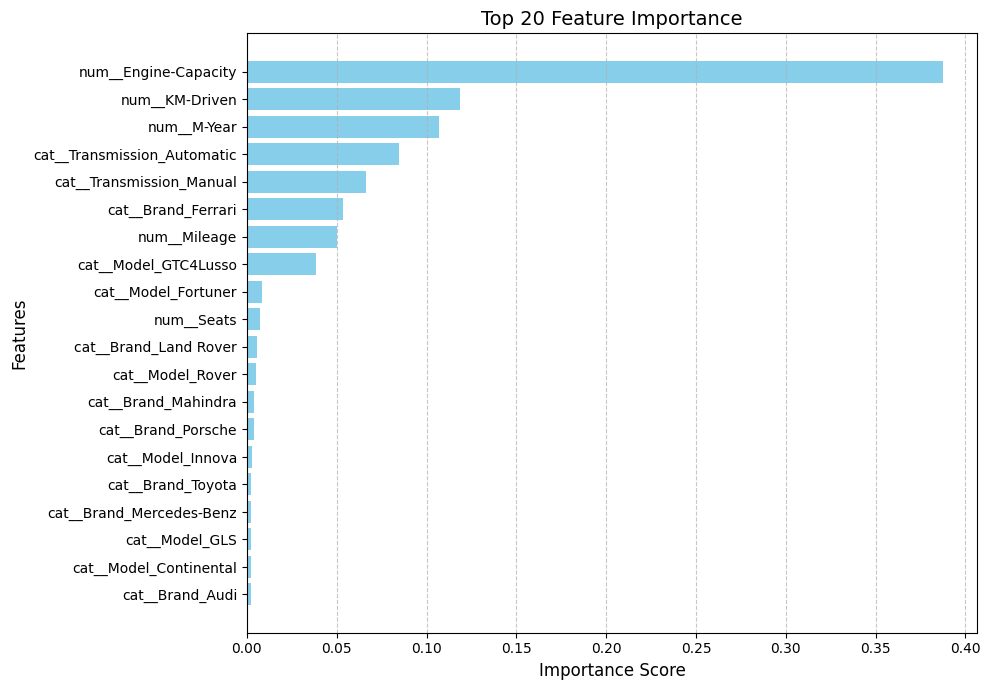

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Feature Importance Plot (Using Transformed Data) ---
# Replace your original block with this entire section

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from google.colab import files # Assuming you're still in Colab for files.download

print("\nCalculating and plotting feature importance...")

# Define and fit the model ONCE using the TRANSFORMED data
# (Ensure X_train_transformed and y_train are available from previous steps)
model_for_importance = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Added n_jobs
model_for_importance.fit(X_train_transformed, y_train) # <<< USES TRANSFORMED DATA

feature_importance = model_for_importance.feature_importances_

# Get feature names (Ensure 'preprocessor' is fitted and feature_names were generated correctly earlier)
# It's assumed 'feature_names' variable holds the output from preprocessor.get_feature_names_out()
# Example: feature_names = preprocessor.get_feature_names_out() # This line should exist earlier in your code

# --- Create DataFrame and Plot ---
if 'feature_names' in locals() and len(feature_names) == len(feature_importance):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nTop 10 Feature Importances (Post-Transformation):\n", feature_importance_df.head(10))

    # --- Plot Top K Features ---
    K = 20  # Select how many top features to display (adjust as needed)
    top_features = feature_importance_df.head(K)

    plt.figure(figsize=(10, max(6, K * 0.35))) # Adjust figure size based on K
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue') # Horizontal bar chart
    plt.xlabel("Importance Score", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.title(f"Top {K} Feature Importance", fontsize=14)
    plt.gca().invert_yaxis() # Display most important features at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout() # Adjust layout to prevent labels overlapping

    # Save the figure
    plot_filename = "feature_importance_top_k.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"\nFeature importance plot saved as {plot_filename}")

    plt.show()

    # Optionally download the saved image
    try:
        files.download(plot_filename)
    except NameError:
        print("Skipping file download (google.colab.files not available outside Colab).")

elif 'feature_names' not in locals():
     print("\nError: 'feature_names' variable not found. Make sure preprocessor.get_feature_names_out() was called after fitting the preprocessor.")
else:
    # This error case is important!
    print(f"\nError: Mismatch between number of feature names ({len(feature_names)}) and feature importances ({len(feature_importance)}).")
    print("This usually means the model was not trained on the data corresponding to 'feature_names'.")
    print("Ensure the model is fitted on X_train_transformed.")

# --- End of Replacement Block ---

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

feature_names = preprocessor.get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Line Graph")
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'Hyundai'

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_transformed, y_train)

feature_importance = model.feature_importances_

feature_names = preprocessor.get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(120, 20))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Line Graph")
plt.grid(True)

plt.savefig('feature_importance.png', dpi=500, bbox_inches='tight')

plt.show()

# Optionally download the saved image
from google.colab import files
files.download('feature_importance.png')

In [ ]:
# prompt: I want to download the above graph in the best possible quality

import matplotlib.pyplot as plt

# ... (Your existing code) ...

plt.figure(figsize=(120, 20))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Line Graph")
plt.grid(True)

# Save the plot to a high-resolution image file (e.g., PNG or SVG)
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight') # For PNG
# plt.savefig('feature_importance.svg', bbox_inches='tight') # For SVG (vector format)

plt.show()

# Optionally download the saved image
from google.colab import files
files.download('feature_importance.png')


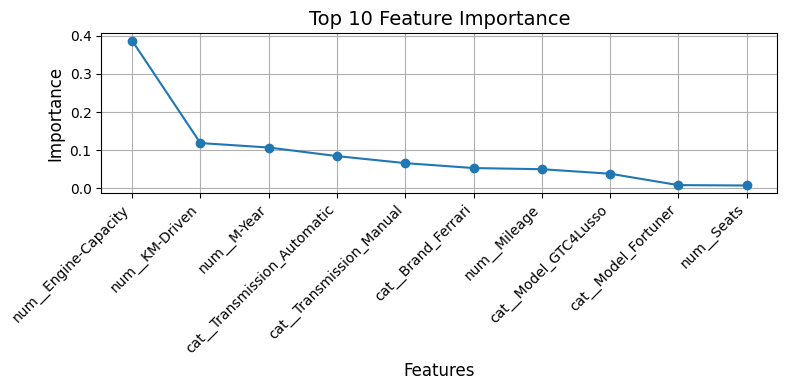

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Select the top K most important features
K = 10  # You can reduce to 5 for a smaller graph
top_features = feature_importance_df.head(K)

# Plot only the top K features
plt.figure(figsize=(8, 4))  # Adjust size for a research paper
plt.plot(top_features['Feature'], top_features['Importance'], marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.title(f"Top {K} Feature Importance", fontsize=14)
plt.grid(True)
plt.tight_layout()  # Optimize spacing

# Save the figure (for use in research paper)
plt.savefig("feature_importance_short.png", dpi=300, bbox_inches='tight')

plt.show()

from google.colab import files
files.download('feature_importance_short.png')

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

In [ ]:

import pickle

print("\n--- Training and Evaluating Models ---")

# Define model instances
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    # Add other models here if desired
}

results = {}
trained_models = {} # <-- Dictionary to store the ACTUAL trained model objects

for name, model in models.items():
    print(f"Training {name}...")
    # Fit on the TRANSFORMED training data
    model.fit(X_train_transformed, y_train) # <<<< FIX: Use X_train_transformed
    trained_models[name] = model # <-- Store the fitted model object

    # Predict on the TRANSFORMED test data
    y_pred = model.predict(X_test_transformed) # <<<< FIX: Use X_test_transformed

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred) # Also calculate MAE
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R² Score": r2}
    print(f"  {name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R² Score: {r2:.4f}")

# Find the name of the best model based on R² Score
best_model_name = max(results, key=lambda k: results[k]['R² Score'])
best_model_score = results[best_model_name]['R² Score']

# Retrieve the actual best trained model object from the dictionary
best_model_object = trained_models[best_model_name] # <<<< FIX: Get the TRAINED model

print(f"\n🏆 Best Model: {best_model_name} with R² Score: {best_model_score:.4f}")

# --- Save the Best Trained Model ---
filename = 'Best-Car-Price-Predictor.pkl'
print(f"Saving the best model ({best_model_name}) to {filename}...")
# Save the ACTUAL FITTED model object
with open(filename, 'wb') as file:
    pickle.dump(best_model_object, file) # <<<< FIX: Save the TRAINED model object
print("Model saved.")

# --- End of Corrected Block ---


--- Training and Evaluating Models ---
Training Linear Regression...
  Linear Regression - MSE: 305663493979.59, MAE: 188197.10, R² Score: 0.6408
Training SVR...
  SVR - MSE: 897002227029.87, MAE: 403680.45, R² Score: -0.0540
Training Random Forest...
  Random Forest - MSE: 130043961032.54, MAE: 107955.81, R² Score: 0.8472
Training Extra Trees...
  Extra Trees - MSE: 123449909927.15, MAE: 107431.97, R² Score: 0.8549

🏆 Best Model: Extra Trees with R² Score: 0.8549
Saving the best model (Extra Trees) to Best-Car-Price-Predictor.pkl...
Model saved.


In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}
    print(f"{name} - MSE: {mse:.2f}, R² Score: {r2:.4f}")

# Find the most accurate model
best_model = max(results, key=lambda x: results[x]['R² Score'])
print(f"\n🏆 Best Model: {best_model} with R² Score: {results[best_model]['R² Score']:.4f}")


ValueError: could not convert string to float: 'Hyundai'

In [ ]:
import pickle
filename = 'Best-Car-Price-Predictor.pkl'
pickle.dump(models[best_model], open(filename, 'wb'))

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}
    print(f"{name} - MSE: {mse:.2f}, R² Score: {r2:.4f}")

# Find the most accurate model
best_model = max(results, key=lambda x: results[x]['R² Score'])
print(f"\n🏆 Best Model: {best_model} with R² Score: {results[best_model]['R² Score']:.4f}")


In [ ]:
import pickle
filename = 'Best-Car-Price-Predictor.pkl'
pickle.dump(models[best_model], open(filename, 'wb'))

In [ ]:
# models = [LinearRegression, RandomForestRegressor, SVR, DecisionTreeRegressor, ExtraTreesRegressor]
# modelss = ["LinearRegression", "RandomForestRegressor", "SVR", "DecisionTreeRegressor", "ExtraTreesRegressor"]
# mse = []
# rmse = []
# evs = []
# r_square_score = []

# for model in models:
#     regressor = model().fit(X_train, y_train)
#     pred = regressor.predict(X_test)
#     mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
#     rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
#     evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
#     r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [ ]:
ML_model_df=pd.DataFrame({"Model":modelss,
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid_search = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

print(f"Tuned Random Forest Mean Squared Error: {mse_rf}")
print(f"Tuned Random Forest R-squared: {r2_rf}")


In [ ]:
# Create and train the RandomForestRegressor model
model_R = RandomForestRegressor()
regressor_R = model_R.fit(X_train, y_train)

# Make predictions on the test set
pred = regressor_R.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
# Create and train the RandomForestRegressor model
model_E = ExtraTreesRegressor()
regressor_E = model_E.fit(X_train, y_train)

# Make predictions on the test set
pred = regressor_E.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")


In [ ]:
pf = pd.DataFrame({
    'Brand': ['Maruti'],
    'Model': ['Alto'],
    'M-Year': [2014],
    'KM-Driven': [120000],
    'Mileage': [19.70],
    'Engine-Capacity': [0.8],
    'Seats': [5],
    'Fuel-Type': ['Petrol'],
    'Transmission': ['Manual']
})

In [ ]:
pf_encoded = pd.get_dummies(pf)

In [ ]:
# prompt: Save the trained model

import pickle

# Assuming 'regressor' is your trained model
filename = 'Predict-Car.pkl'
pickle.dump(regressor_R, open(filename, 'wb'))
